<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/Information_de_Fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce TP on va donner l'intuition de l'information de Fisher qui est très importante en estimation, mais qui trouve d'autres usages en statistiques.

In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
import numpy as np
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Tracer une courbe avec matplotlib et numpy

Comment tracer une fonction avec python ?
Supposons qu'on veuille tracer la fonction $f(x) = x$.
On procède ainsi: on commence par générer des points sur un intervalle: ici la commande `np.linspace(0,1,100)` génére 100 points compris entre 0 et 1. ensuite on associe à y la valeur de la fonction pour chaque point de l'intervalle.

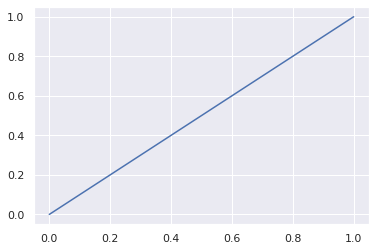

In [2]:
x = np.linspace(0,1,100)
y = x
plt.plot(x,y)

Si on veur tracer la fonction $f(x)=x^{2}$ sur l'intervalle [-1,1] on procède similairement:

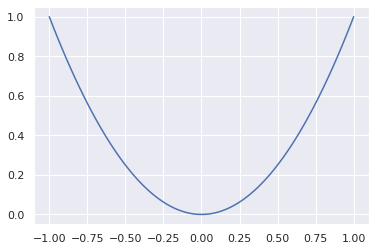

In [3]:
x = np.linspace(-1,1,100)
y = x**2
plt.plot(x,y)

Si vous voulez tracer les deux fonctions sur un même graphe avec une légende, vous faites:

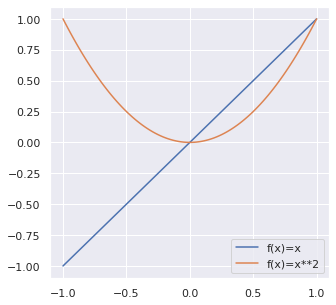

In [ ]:
x = np.linspace(-1,1,100)
y1 = x
y2 = x**2

plt.plot(x,y1, label="f(x)=x")
plt.plot(x,y2, label="f(x)=x**2")
plt.legend()

# 2. Information de Fisher et fonction de vraisemblance

## 2.1 Questions de cours 
Pour illustrer l'information de Fisher, on va observer la vraisemblance de plusieurs variables aléatoires:

Question de cours:
* Rapellez la formule de l'information de Fisher.
* Rapellez la densité d'une variable de Bernoulli et calculez la fonction de vraisemblance pour un n-échantillon.
* Déduisez-en la fonction de la log-vraisemblance

Pour rappel, le code ci-dessous permettent de générer les variables aléatoires correspondantes

[Text(0, 0.5, 'Fréquence'), Text(0.5, 0, 'Loi de Bernoulli')]

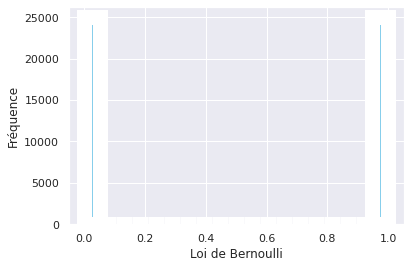

In [58]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=50000,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Loi de Bernoulli', ylabel='Fréquence')

### Question - code
* Implémentez la fonction `vraisemblance_bernoulli` et `log_vraisemblance_bernoulli` ci-dessous.


In [21]:
def vraisemblance_bernoulli(proba, n_sample):
  """  
  Entree:
    proba: probabilite que X=1.
    n_sample: taille de l'echantillon a generer
  Sortie:
    espace_parametre: ici le parametre varie entre 0 et 1, utilisez une granularite de 1000 points
    log_vraisemblance: valeur de la fonction de la log vraisemblance pour chaque valeur du parametre avec l'echantillon genere
  """
  pr = np.linspace(0,1,1000)
  data_bern = bernoulli.rvs(size=n_sample,p=proba)
  N0 = np.sum(data_bern) 
  N1 = n_sample - N0
  vraisemblance = pr**(N0) * (1-pr)**(N1)
  return pr, vraisemblance

def log_vraisemblance_bernoulli(proba, n_sample):
  """  
  Entree:
    proba: probabilite que X=1
    n_sample: taille de l'echantillon a generer
  Sortie:
    espace_parametre: ici le parametre varie entre 0 et 1, utilisez une granularite de 1000 points
    vraisemblance: valeur de la fonction de vraisemblance pour chaque valeur du parametre avec l'echantillon genere
  """
  pr, vraisemblance = vraisemblance_bernoulli(proba, n_sample)
  return pr, np.log(vraisemblance)



Maintenant, nous allons tester les fonctions que vous avez proposés

## 2.2 Qualité du maximum en fonction de la taille de l'échantillon
* Sur une première cellule tracez la vraisemblance obtenue avec un 10-échantillon $~\mathcal{B}(0.5)$
* Sur une seconde cellule tracez la vraisemblance obtenue avec un 100-échantillon $~\mathcal{B}(0.5)$
* Sur une troisième cellule tracez la vraisemblance obtenue avec un 500-échantillon $~\mathcal{B}(0.5)$

Observez la fonction de vraisemblance dans chaque cas, que remarquez-vous sur la nature du maximum dans chaque cas ?

Essayez d'éxécuter une cellule plusieurs fois. Que remarquez-vous ? 

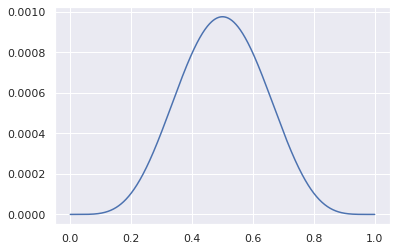

In [23]:
x1,y1 = vraisemblance_bernoulli(0.5, 10)
plt.plot(x1,y1)

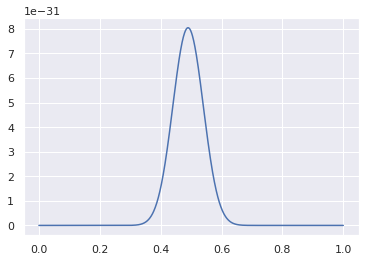

In [24]:
x1,y1 = vraisemblance_bernoulli(0.5, 100)
plt.plot(x1,y1)

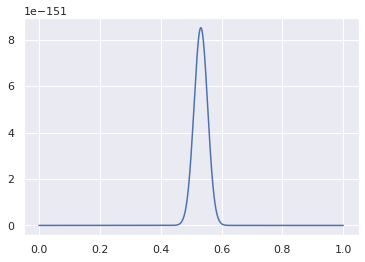

In [25]:
x1,y1 = vraisemblance_bernoulli(0.5, 500)
plt.plot(x1,y1)


L'information de Fisher est une mesure de la courbature de la fonction de vraisemblance. Plus la courbature est forte autour d'un paramètre, plus ils est vraisemblable que ce paramètre ait généré les données: i.e dans notre cas $p(x_{1}, \cdots, x_{n}| p=0.5)$ est plus vraisemblable que $p(x_{1}, \cdots, x_{n}| p=0.1)$.

Ainsi quand on dit que l'information de Fisher est l'information que révèle un échantillon sur le paramètre, on entends par là, que l'échantillon révèle l'information sur la courbature de la fonction de vraisemblance et nous révèle plus nettement la position du vrai paramètre.

Nous allons investiguer cela dans la suite.

## 3. Variabilité du maximum de vraisemblance

* Tracez sur le même graphe 5 fonction de vraisemblance avec un 10-échantillon
* Tracez sur un nouveau graphe 5 fonction de vraisemblance avec un 100-échantillon
* Éxécutez les cellules plusieurs fois et donnez un intervalle approximatif sur lequel peut apparaître le maximum de vraisemblance dans chaque cas.





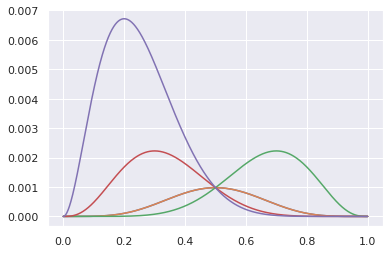

In [28]:
x1, y1 = vraisemblance_bernoulli(0.5, 10)
x2, y2 = vraisemblance_bernoulli(0.5, 10)
x3, y3 = vraisemblance_bernoulli(0.5, 10)
x4, y4 = vraisemblance_bernoulli(0.5, 10)
x5, y5 = vraisemblance_bernoulli(0.5, 10)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

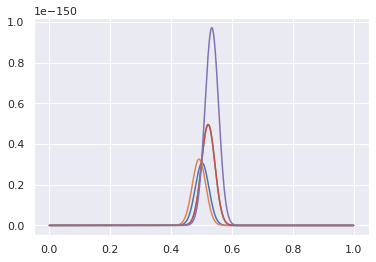

In [31]:
x1, y1 = vraisemblance_bernoulli(0.5, 500)
x2, y2 = vraisemblance_bernoulli(0.5, 500)
x3, y3 = vraisemblance_bernoulli(0.5, 500)
x4, y4 = vraisemblance_bernoulli(0.5, 500)
x5, y5 = vraisemblance_bernoulli(0.5, 500)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

Observez aussi l'échelle de ces fonctions. Si vous faites attention, vous remarquerez qu'on peut difficilement comparer des tailles d'échantillons différentes sur un même graphe. Le logarithme permet d'outre passer ce problème.

## 4. Log vraisemblance

Un élément intéressant est que le logarithme stabilise, et il permet de comparer directement l'effet de plusieurs taille d'échantillon. En d'autres termes, il permet de *zoomer* sur la fonction de vraisemblance.

### Question
* Sur une seule cellule maintenant tracer la log vraisemblance associée à un 10-échantillon, un 100-échantillon, et un 500-échantillon.

Quelle fonction précise le mieux la position du maximum ?


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


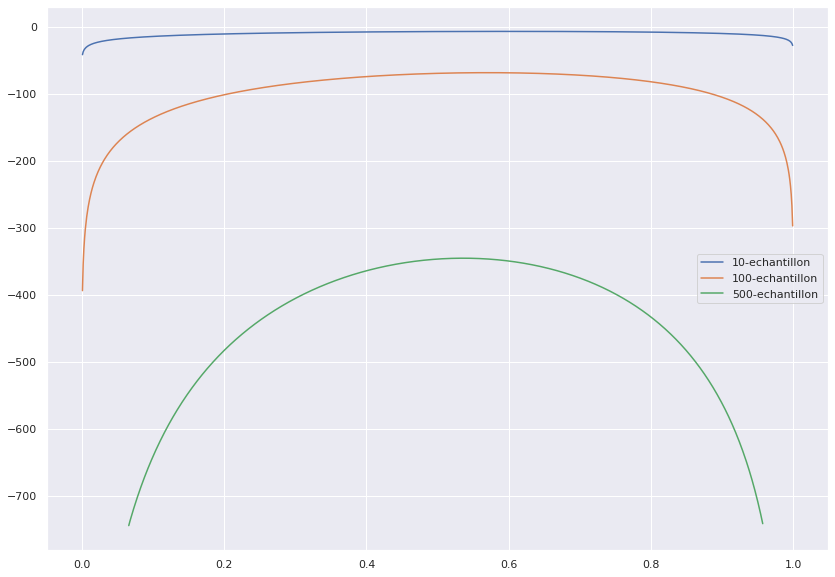

In [36]:
x1,y1 = log_vraisemblance_bernoulli(0.5, 10)
x2,y2 = log_vraisemblance_bernoulli(0.5, 100)
x3,y3 = log_vraisemblance_bernoulli(0.5, 500)
plt.figure(figsize=(14,10))
plt.plot(x1,y1, label="10-echantillon")
plt.plot(x2,y2, label="100-echantillon")
plt.plot(x3,y3, label="500-echantillon")
plt.legend()

*  Sur un nouveau graphe tracez 5 fonction de log vraisemblance avec un 10-échantillon, puis avec un 500-échantillon.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


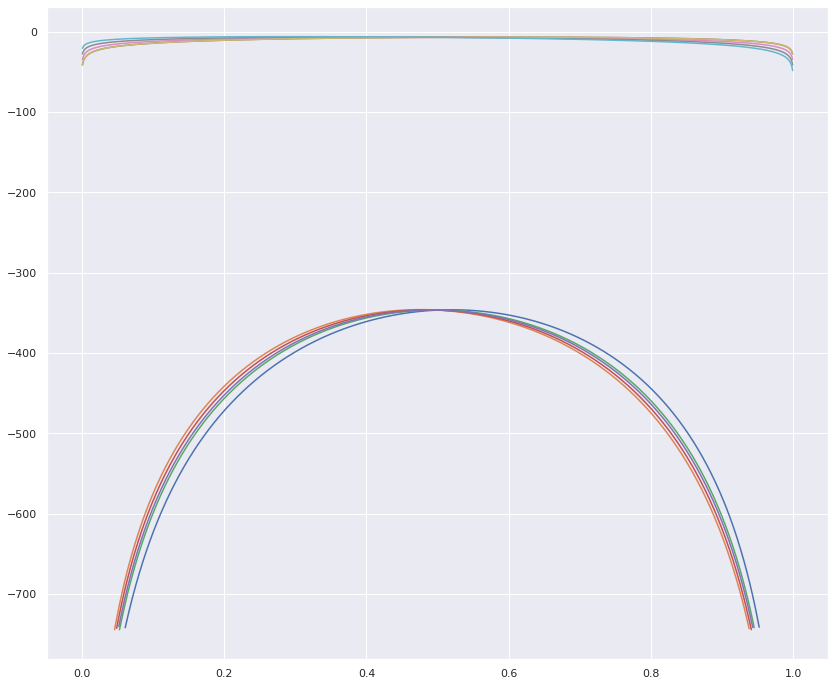

In [38]:
x1,y1 = log_vraisemblance_bernoulli(0.5, 500)
x2, y2 = log_vraisemblance_bernoulli(0.5, 500)
x3, y3 = log_vraisemblance_bernoulli(0.5, 500)
x4, y4 = log_vraisemblance_bernoulli(0.5, 500)
x5, y5 = log_vraisemblance_bernoulli(0.5, 500)
plt.figure(figsize=(14,12))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

x6, y6 = log_vraisemblance_bernoulli(0.5, 10)
x7, y7 = log_vraisemblance_bernoulli(0.5, 10)
x8, y8 = log_vraisemblance_bernoulli(0.5, 10)
x9, y9 = log_vraisemblance_bernoulli(0.5, 10)
x10, y10 = log_vraisemblance_bernoulli(0.5, 10)
plt.plot(x6,y6)
plt.plot(x7,y7)
plt.plot(x8,y8)
plt.plot(x9,y9)
plt.plot(x10,y10)

# 5. Borne de Cramer-Rao et convergence de l'estimateur du max de vraisemblance
Observons maintenant la convergence asymptotique du maximum de vraisemblance. Observons ce que la borne de Cramer

### Questions calculatoires
* Rapellez l'estimateur du maximum de vraisemblance pour un n-échantillon suivant une loi de Bernoulli. On le notera $\hat \theta_{MV}$ dans la suite.
* $\hat \theta_{MV}$ est il sans biais ?
* Montrez que l'information de Fisher associé à un n-échantillon de v.a suivant une loi de Bernoulli est $I_{n}(p) = \frac{n}{p(p-1)}$ .Indication: utilisez la formulation $-\mathbb{E}[\nabla^{2}\log f(x;p]$.
* $\hat \theta_{MV}$ est-il efficace ?
* Donnez la loi asymptotique de $\hat \theta_{MV}$. 

### Questions code
* Implémentez la fonction `cramer_rao_bernoulli` ci-dessous. 

In [60]:
def cramer_rao_bernoulli(taille_echantillons, proba):
  """
  Cett fonction prend en entree une suite d'entiers [n1, ..., nk] et retourne la borne de Cramer Rao associee a chaque valeur de n
  i.e [C_{n1}, ...,c_{nk}]
  Input: 
    taille_echantillons: array of Int. Un tableau d'entiers dont chaque cellule représente une taille d'échantillon
  Output:
    borne_cramer_rao: array of Float. Un tableau de flottant dont chaque cellule represente la borne de cramer rao associe
      a l'entier n de taille_echantillons.
  """
  return proba * (1-proba) / taille_echantillons
  


Maintenant, nous allons observer empiriquement la variance de l'estimateur $\hat \theta_{MV}$ et la comparer aàà la borne de Cramer Rao. Pour cela on réutilise le code du TP précédent.

In [45]:
def evaluate_estimator(data, estimator, taille_echantillon, nb_estimation):
  """
  Input:
    data: (numpy array) le jeu de données considéré
    estimator: (fonction) l'estimateur dont on veut étudier la convergence
    taille_echantillon: (Int) de l'échantillon pour calculer une estimation 
      par exemple il s'agit de n pour Tn.   
    nb_estimation: (Int): Il s'agit du nombre d'estimation dont on a besoin pour évaluer la loi
      de l'estimateur    
  Output:
    evaluations: un tableau composé des différentes estimations
  """
  estimations = []
  for i in range(nb_estimation):
    echantillon = np.random.choice(data, taille_echantillon)   # X1, ..., Xn 
    estimation = estimator(echantillon)   #x ~ Tn    
    estimations.append(estimation)
  return np.array(estimations)

def evaluate_loi_estimator(data, estimator, taille_echantillons, nb_estimation):
  """
  Ce code genere nb_estimation d'un estimator Tn pour des tailles_echantillons n croissantes
  Cela permet par la suite d'observer la convergence de la loi de Tn.
  Input:
    data: (numpy array) le jeu de données considéré
    estimator: (fonction) l'estimateur dont on veut étudier la convergence
    taille_echantillons: un tableau dont chaque cellule représente une taille d'échantillon
      qu'on utilisera pour effectuer une estimation.  
    nb_estimation: (Int): Il s'agit du nombre d'estimation dont on a besoin pour évaluer la loi
      de l'estimateur.    
  Output:
    evaluations: un tableau composé des différentes estimations
  """
  evaluations = []
  for i in range(len(taille_echantillons)):
    evaluations.append(evaluate_estimator(data, estimator, taille_echantillons[i], nb_estimation)) 
  return np.array(evaluations)


In [67]:
taille_echantillons = np.arange(10,500,1)
data_bern = bernoulli.rvs(size=50000,p=0.5)
total_estimations = evaluate_loi_estimator(data_bern, np.mean, taille_echantillons, 100)

In [68]:
total_estimations_mean = total_estimations.mean(axis=1)
total_estimations_var = total_estimations.var(axis=1)

Text(0.5, 0, 'taille echantillon')

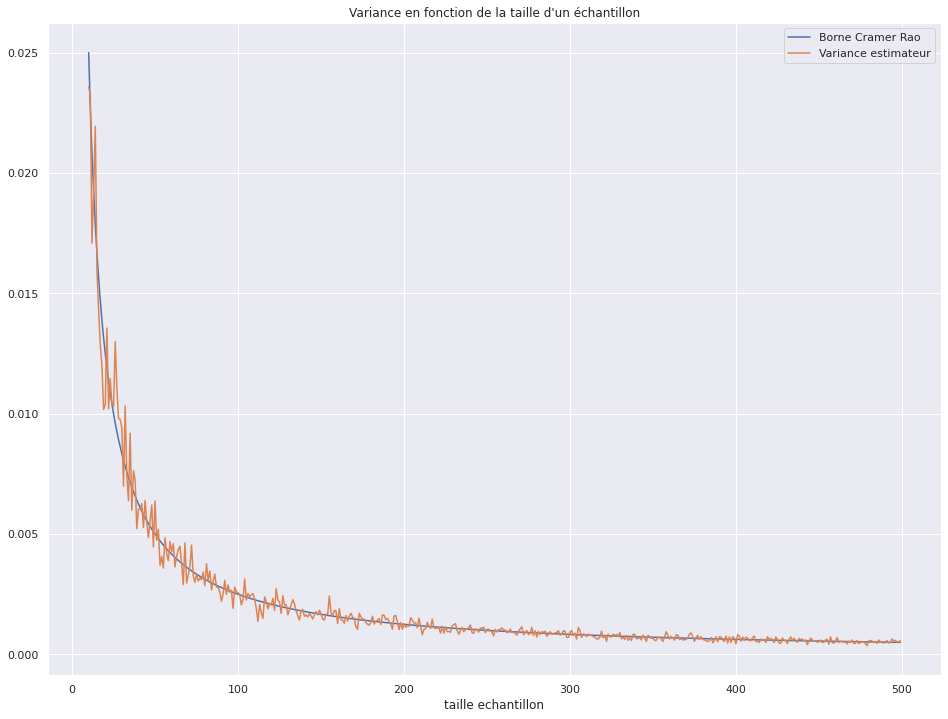

In [69]:
plt.figure(figsize=(16,12))
# plt.plot(x, total_estimations_mean, label="moyenne estimateur")
plt.plot(taille_echantillons,cramer_rao_bernoulli(taille_echantillons, proba=0.5), label="Borne Cramer Rao")
plt.plot(taille_echantillons, total_estimations_var, label="Variance estimateur")
plt.title("Variance en fonction de la taille d'un échantillon")
plt.legend()
plt.xlabel("taille echantillon")

En résumé:
* L'information de Fisher est associée à la borne de Cramer Rao.
* La borne de Cramer Rao, représente une borne inférieure à la variance d'un estimateur sans biais.
* Lorsqu'un estimateur sans biais à pour variance la borne de Cramer Rao, alors il est efficace. En d'autres termes, c'est un estimateur de variance minimale.